In [1]:
import sys
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Illustris
nexus_python_path = os.path.abspath("/Users/users/nastase/Applications/NEXUS_python/NEXUS_1.0/python/python_import/")
sys.path.append(nexus_python_path)
import illustris_python as il

# Import redshift to snapshot dict
shared_path = os.path.abspath("/Users/users/nastase/GitBub/Thesis/code/shared/")
sys.path.append(shared_path)
from utilities import get_redshift_dictionary

you extract the IDs associated to a particular environment at a snapshot.
then you look for those IDs in the other snapshot and check how many stayed in the same environment vs how many 
    moved to a different type of environment

In [2]:
def load_dfs(snapnums):
    
    dfs = []
    for snapnum in snapnums:
        if snapnum <100:
            snapnum = f"0{snapnum}"
        with open(f'/Users/users/nastase/PROJECT/DATA/nexus_outputs/particle_selecta/particle_types_dataframe_{snapnum}.pickle', 'rb') as handle:
            dfs.append(pickle.load(handle))
       
    return dfs

In [3]:
def join_dfs(base_df, dfs_to_join):
    df = base_df
    
    for df_to_join in dfs_to_join:
        df = df.join(df_to_join)
        
    return df

In [4]:
snapshot_list = get_redshift_dictionary()["snapshots"]

In [5]:
# Note: Load 'dfs' from 'nexus_outputs/particle_selecta/list_of_small_selectas.pickle'
# dfs = load_dfs(snapshot_list)

In [27]:
# for i in range(0,len(snapshot_list)):
#     curr_df = dfs[i]
#     curr_snapshot_number = snapshot_list[i]
#     curr_df.set_index(curr_df.index.astype('uint32', copy=False),inplace=True)
    
#     if curr_snapshot_number < 100:
#         curr_snapshot_number = f"0{curr_snapshot_number}"
    
#     column_name = f"particle_type_{curr_snapshot
# _number}"
#     if curr_snapshot_number == 133:
#         column_name = f"particle_type"
        
#     curr_df[column_name] = curr_df[column_name].astype('category')

In [32]:
# with open(f'/Users/users/nastase/PROJECT/DATA/nexus_outputs/particle_selecta/list_of_small_selectas.pickle', 'wb') as handle:
#     pickle.dump(dfs, handle, protocol=4)

In [33]:
# # Load 'joined_dfs' from 'nexus_outputs/particle_selecta/particle_ids_all.pickle'
# joined_dfs = join_dfs(dfs[0], dfs[1:])

In [5]:
with open(f'/Users/users/nastase/PROJECT/DATA/nexus_outputs/particle_selecta/particle_ids_all.pickle', 'rb') as handle:
    joined_dfs = pickle.load(handle)

In [39]:
# with open(f'/Users/users/nastase/PROJECT/DATA/nexus_outputs/particle_selecta/particle_ids_all.pickle', 'wb') as handle:
#     pickle.dump(joined_dfs, handle, protocol=4)

i want to make plots of f_i_j (ie result of common_mass_fraction) vs the redshift of the snapshot; I want to do it for each env type (ie mass contributions to voids from other env, to filaments from other env...)

In [6]:
def proportions_for_snapshots2(df, base_snapshot, snapshots, initial_particle_type):
    data = []

    if base_snapshot < 100:
        base_snapshot = f"0{base_snapshot}"  
    for snapshot in snapshots:
        
        if snapshot < 100:
            snapshot = f"0{snapshot}"

            
        indexing_name = f'particle_type_{snapshot}'
        tmp = df[df[f"particle_type_{base_snapshot}"] == initial_particle_type][indexing_name]
        proportions = tmp.value_counts(normalize=True).reindex(['n', 'f', 'w', 'v'], fill_value=0)
        
        # Append a tuple with the snapshot index and the proportions for each type
        data.append(proportions)
        print(f"Processed snapshot {snapshot}")

    # Create a DataFrame from the list of Series objects
    return pd.DataFrame(data, index=snapshots, columns=['n', 'f', 'w', 'v'])

In [67]:
proportions2 = proportions_for_snapshots2(joined_dfs, 110, snapshot_list, 'v')

Processed snapshot 135
Processed snapshot 133
Processed snapshot 131
Processed snapshot 129
Processed snapshot 127
Processed snapshot 125
Processed snapshot 123
Processed snapshot 122
Processed snapshot 118
Processed snapshot 114
Processed snapshot 110
Processed snapshot 106
Processed snapshot 102
Processed snapshot 098
Processed snapshot 094
Processed snapshot 090
Processed snapshot 086
Processed snapshot 082
Processed snapshot 078
Processed snapshot 074
Processed snapshot 070
Processed snapshot 066
Processed snapshot 064
Processed snapshot 062
Processed snapshot 060
Processed snapshot 058
Processed snapshot 056
Processed snapshot 054
Processed snapshot 053
Processed snapshot 051
Processed snapshot 049


In [68]:
redshifts = proportions2.index.map(
    lambda x: get_redshift_dictionary()["redshifts"][get_redshift_dictionary()["snapshots"].index(x)]
)
redshifts_values = redshifts.to_numpy()

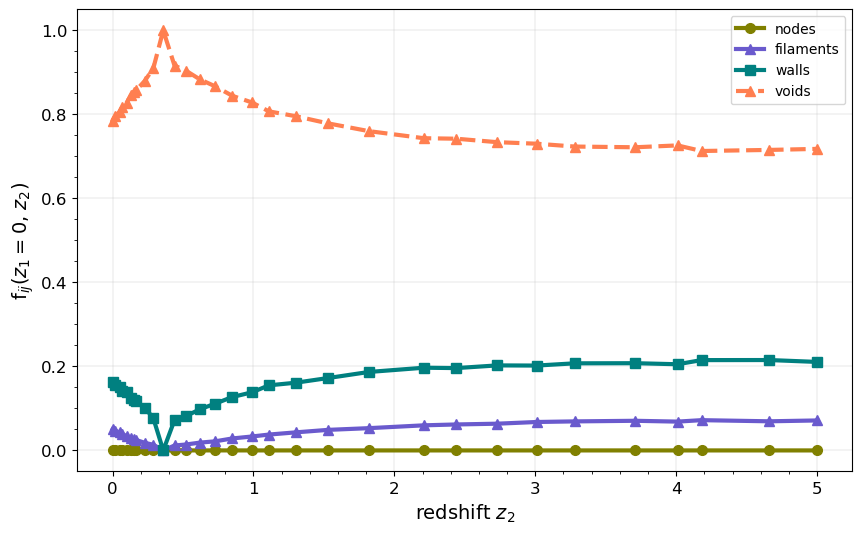

In [70]:
linewidth = 3
markersize = 7
fontsize = 14

plt.figure(figsize=(10,6))
plt.plot(
    redshifts_values, 
    proportions2["n"].values, 
    'o-',color='#808000', label="nodes", linewidth= linewidth, markersize=markersize)
plt.plot(
    redshifts_values, 
    proportions2["f"].values,  
    '^-',color='#6A5ACD', label="filaments", linewidth=linewidth, markersize=markersize)
plt.plot(
    redshifts_values, 
    proportions2["w"].values,
    's-',color='#008080', label="walls", linewidth=linewidth, markersize=markersize)
plt.plot(
    redshifts_values, 
    proportions2["v"].values,
    '^--',color='#FF7F50', label="voids", linewidth=linewidth, markersize=markersize)
plt.grid(linewidth=0.2)
plt.yticks(np.linspace(0, 1, 20, endpoint=False), minor=True)
plt.xticks(np.linspace(0, 5, 25, endpoint=False), minor=True)
plt.tick_params(axis='both', which='major', labelsize=12) 
# plt.xlim(-0.01,1)
# plt.ylim(-0.01, 0.2)
plt.xlabel("redshift $z_2$", fontsize=fontsize)
plt.ylabel("f$_{ij}$($z_1 = 0$, $z_2$)", fontsize=fontsize)
# plt.title("Evolution of $\it{void}$ particles from z = 5", fontsize= fontsize)
# plt.title("Origins of today's $\it{node}$ particles", fontsize= fontsize)
# plt.title("Particuliarity in the origin of $\it{filament}$ particles", fontsize=fontsize)
plt.legend()
# plt.savefig("/Users/users/nastase/GitBub/Thesis/ResultsPaper/figures/voids_110.png")
plt.show()